## Student Performance Indicator

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\Pelux\Desktop\Jupyter Notebook\STUDENT PERFORMANCE\Data\stud.csv')

### Show Top 5 Records

In [3]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- Gender : sex of students -> (Male/female)
- Race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- Parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- Lunch : having lunch before test (standard or free/reduced)
- Test preparation course : complete or not complete before test
- Math score
- Reading score
- Writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in the data set

### 3.2 Check Duplicates


In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [158]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [159]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [160]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [161]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [162]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [163]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

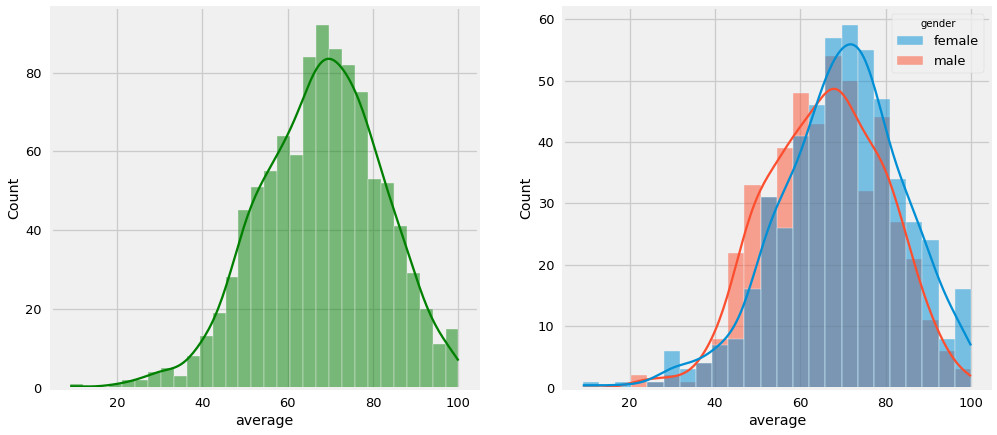

In [164]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

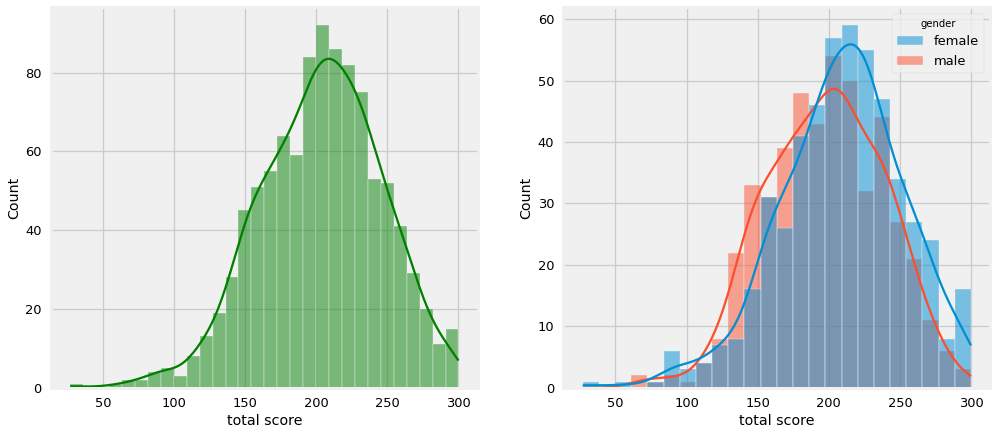

In [165]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

### Insights
- Female students tend to perform well then male students.

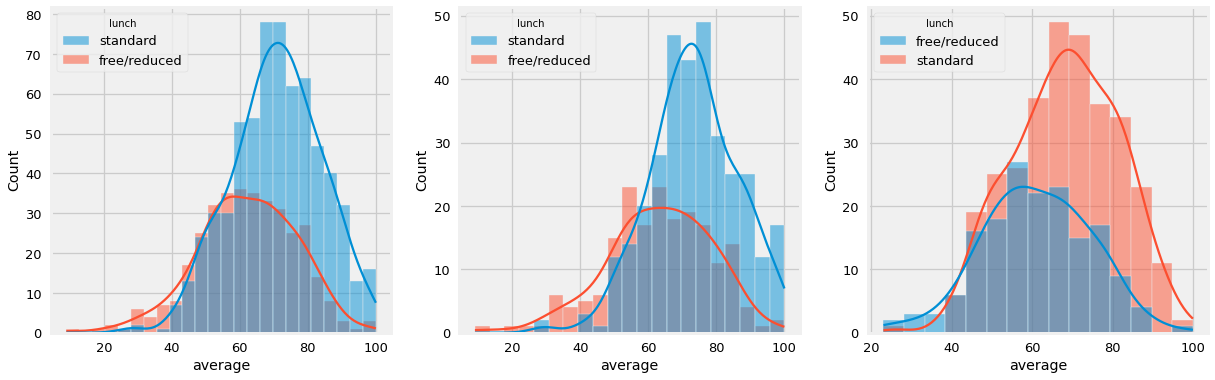

In [166]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

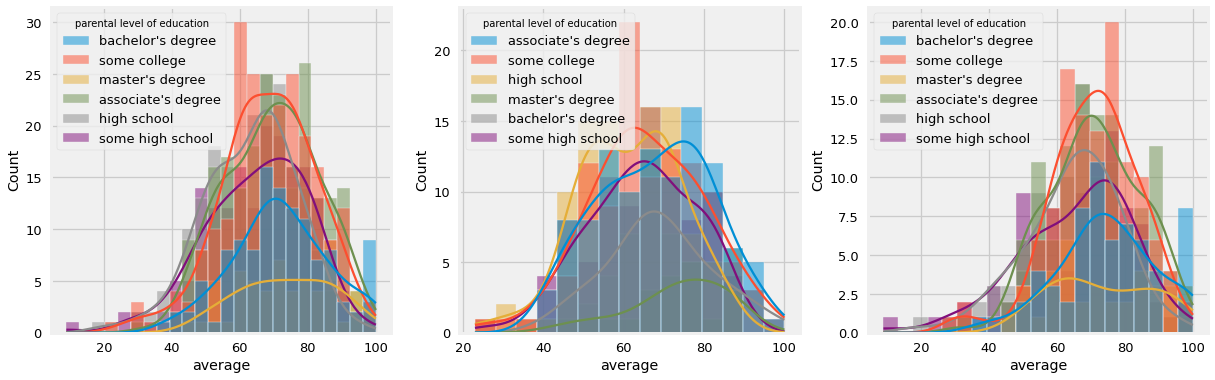

In [167]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

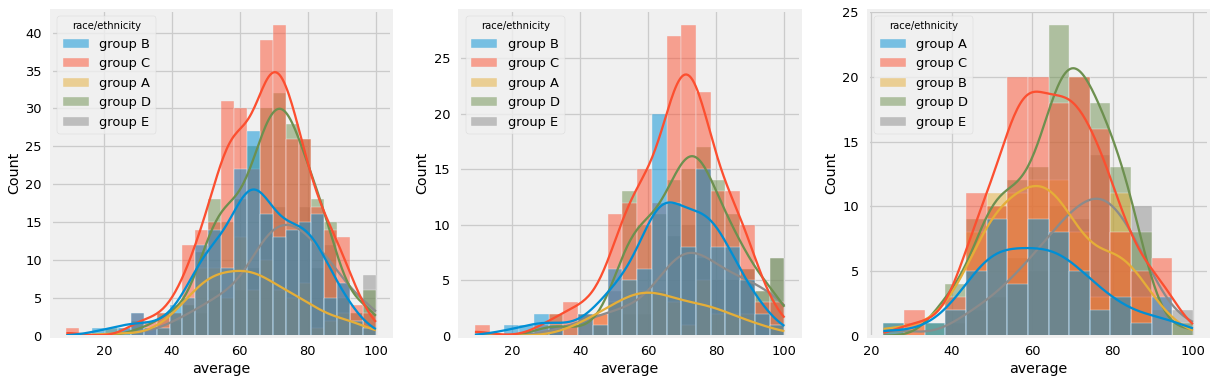

In [168]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

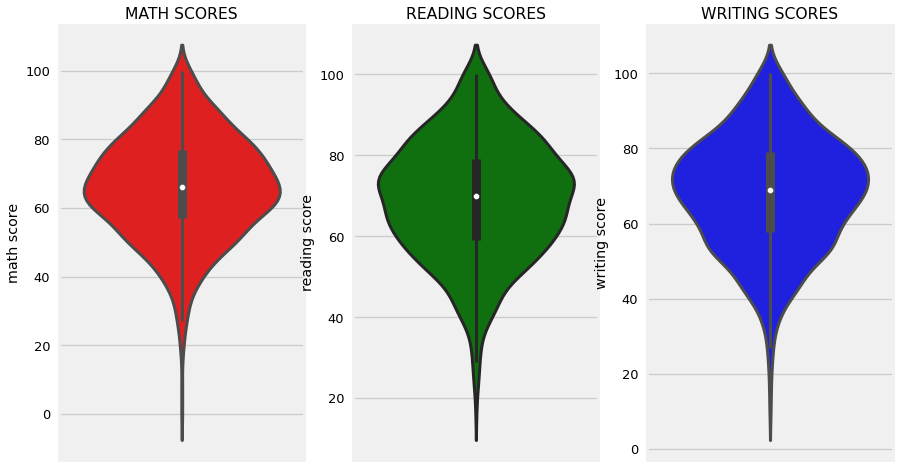

In [169]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

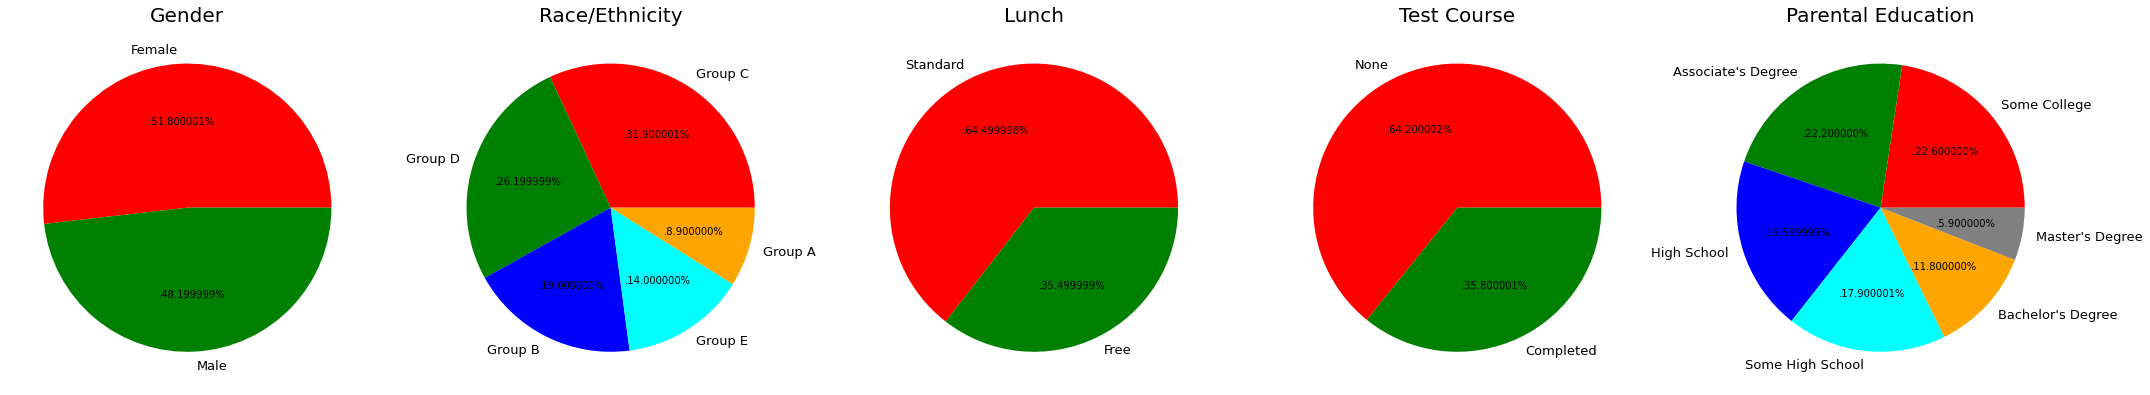

In [170]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

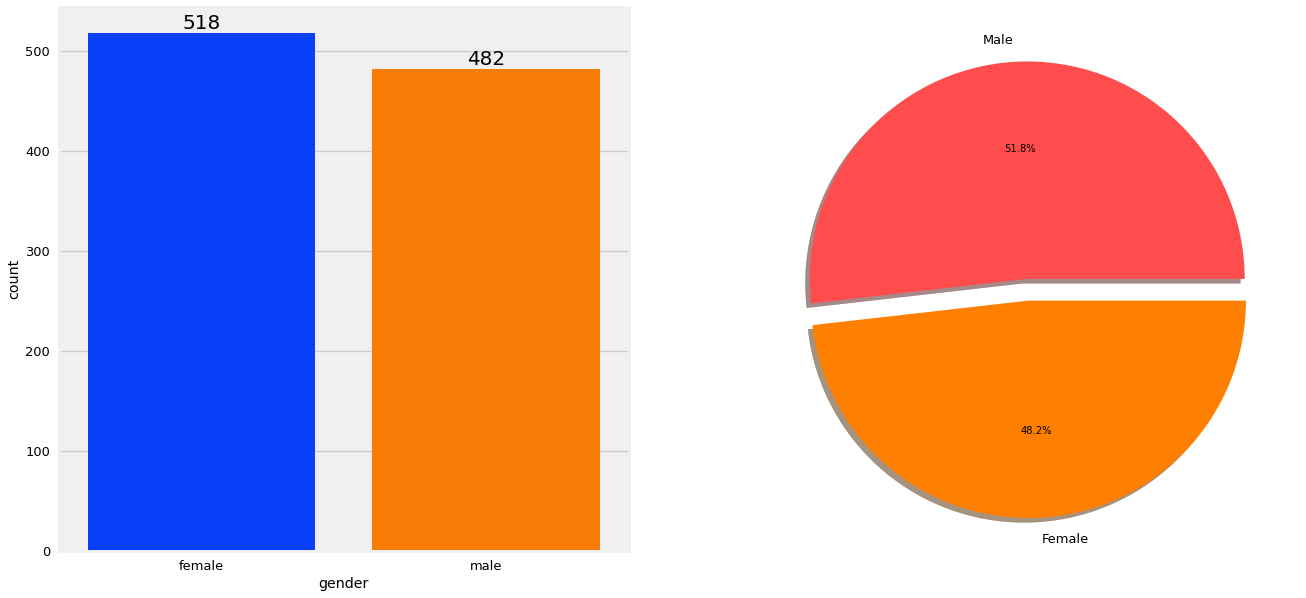

In [171]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [172]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


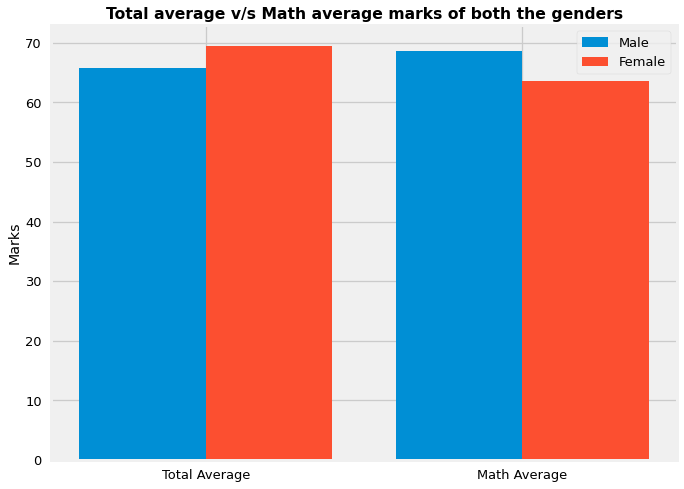

In [173]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

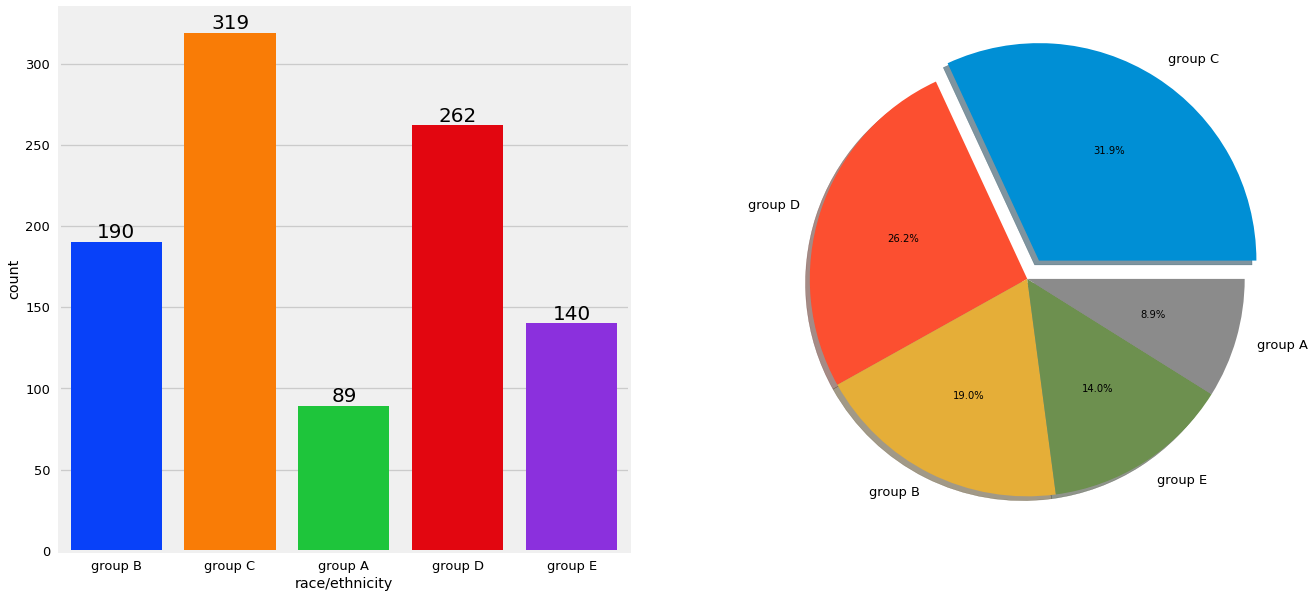

In [174]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

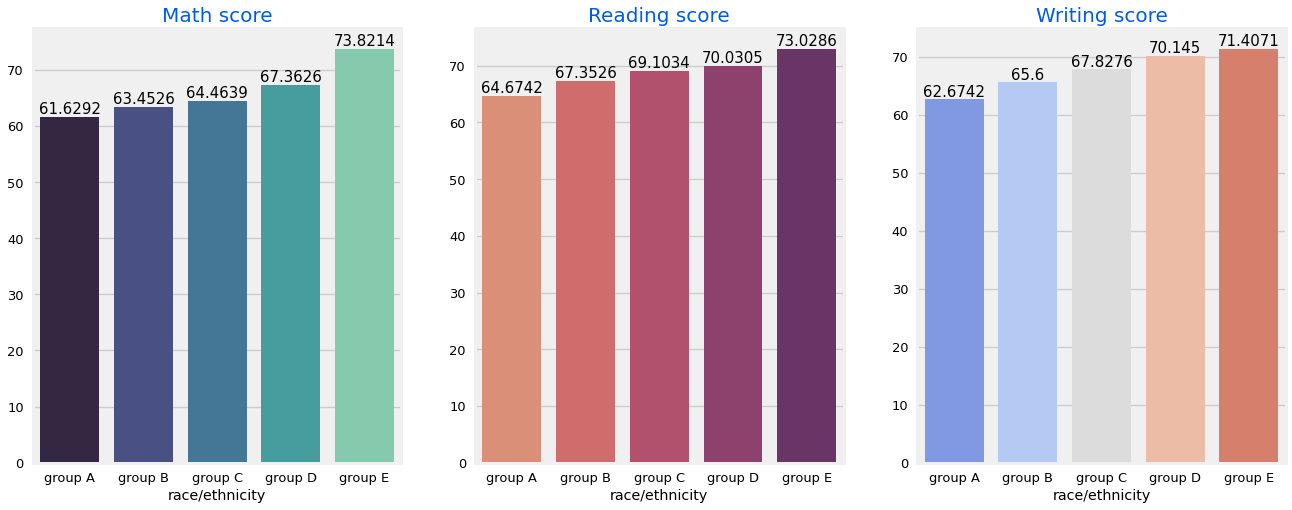

In [175]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

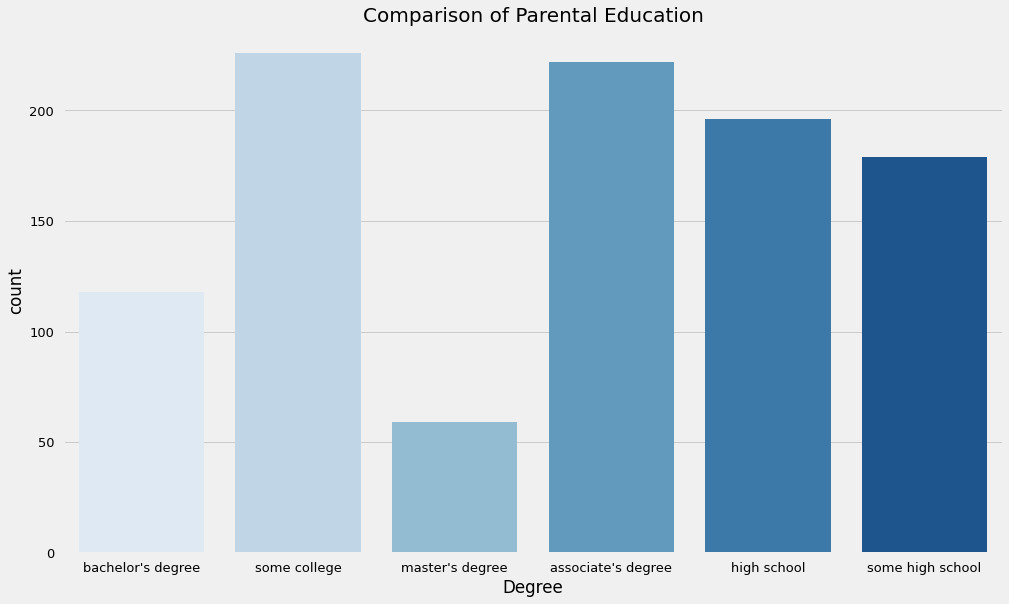

In [176]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
- Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

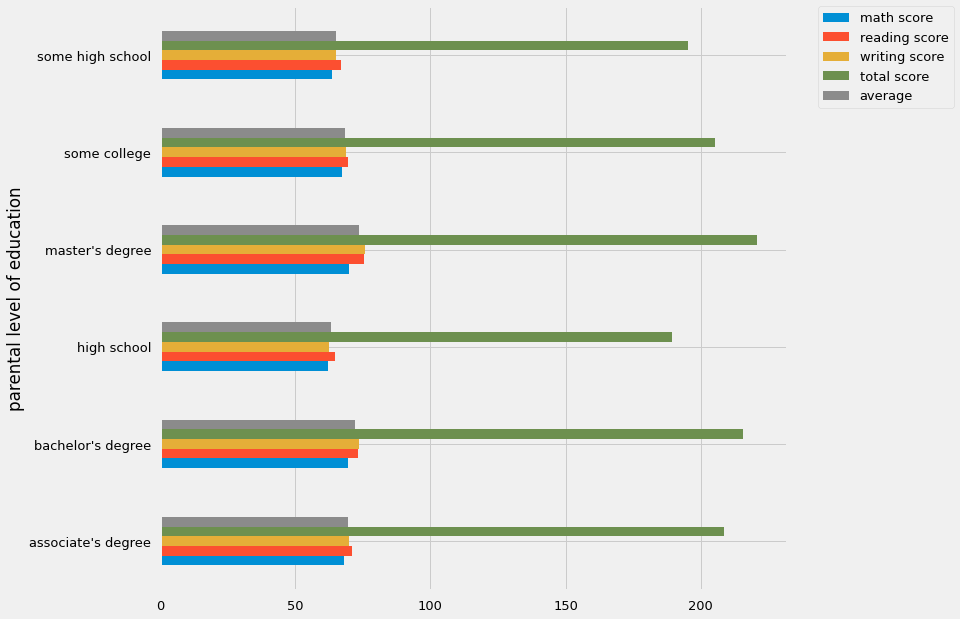

In [177]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

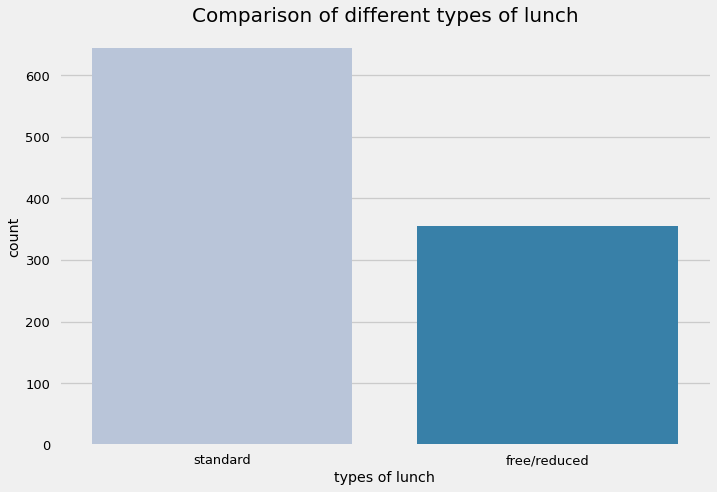

In [178]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

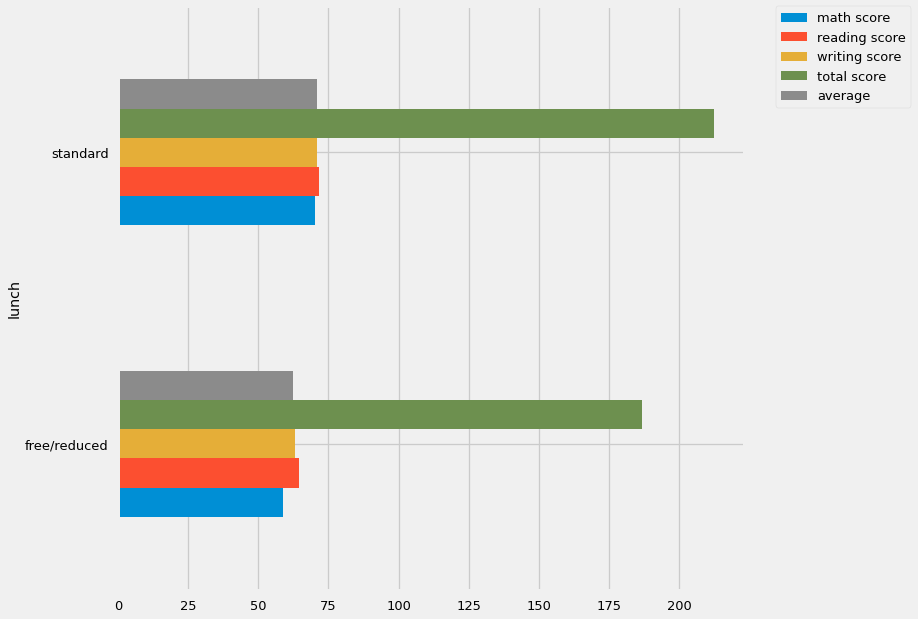

In [179]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot: xlabel='lunch', ylabel='writing score'>

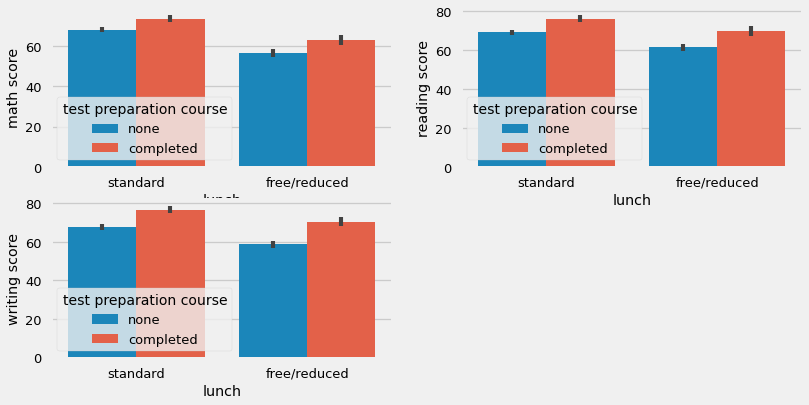

In [180]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

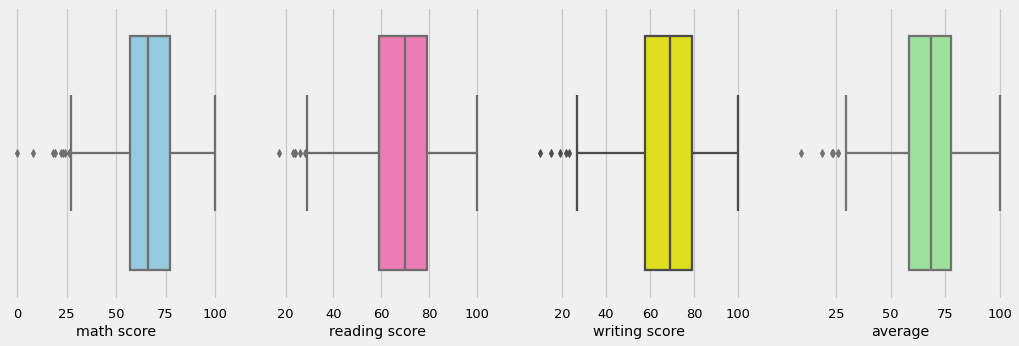

In [181]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

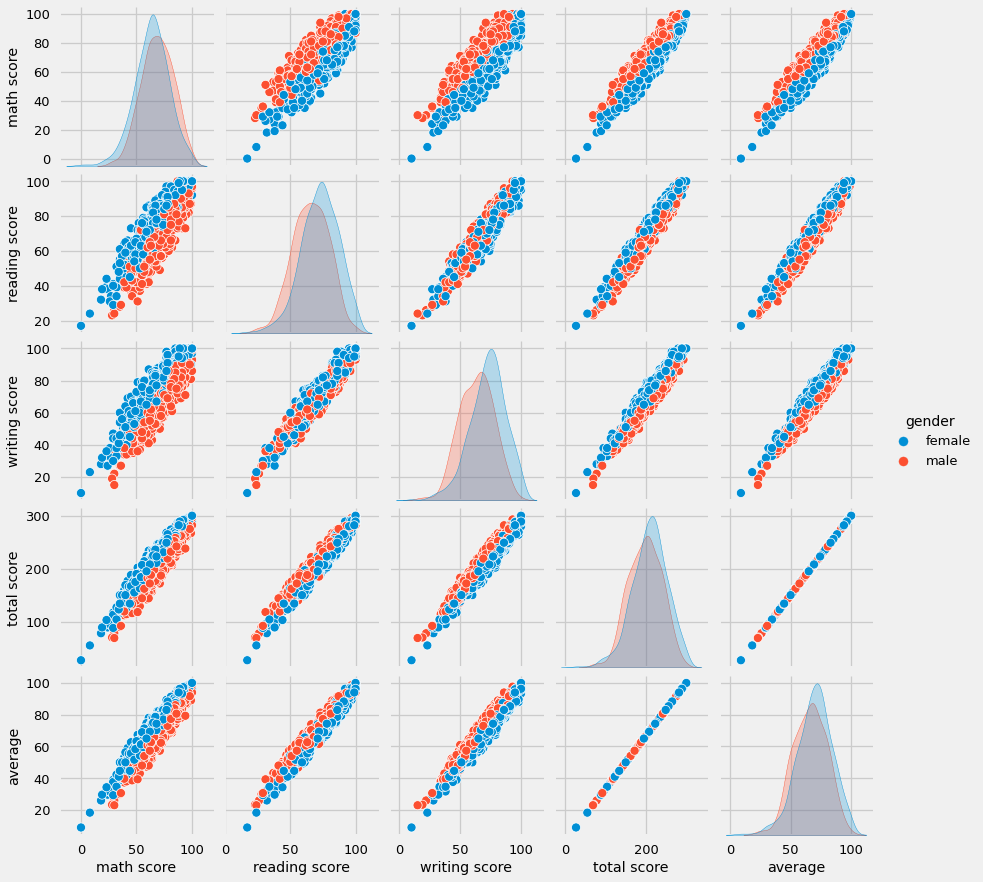

In [182]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

# Model Training

In [89]:
data = pd.read_csv(r'C:\Users\Pelux\Desktop\Jupyter Notebook\STUDENT PERFORMANCE\Data\stud.csv')

In [90]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [91]:
data.rename(
    columns = {"race/ethnicity": "race_ethnicity", "parental level of education": "parental_level_of_education", "test preparation course":"test_preparation_course","reading score": "reading_score", "writing score": "writing_score"},
    inplace = True
)

In [92]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preprocessing Task before Model Building

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [94]:
data['gender_new']= le.fit_transform(data['gender'].values)
data['race_ethnicity_new']= le.fit_transform(data['race_ethnicity'])
data['parental_level_of_education_new']= le.fit_transform(data['parental_level_of_education'])
data['lunch_new']= le.fit_transform(data['lunch'])
data['test_preparation_course_new']= le.fit_transform(data['test_preparation_course'])

In [97]:
data.head(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading_score,writing_score,gender_new,race_ethnicity_new,parental_level_of_education_new,lunch_new,test_preparation_course_new
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1
5,female,group B,associate's degree,standard,none,71,83,78,0,1,0,1,1
6,female,group B,some college,standard,completed,88,95,92,0,1,4,1,0
7,male,group B,some college,free/reduced,none,40,43,39,1,1,4,0,1
8,male,group D,high school,free/reduced,completed,64,64,67,1,3,2,0,0
9,female,group B,high school,free/reduced,none,38,60,50,0,1,2,0,1


In [108]:
data["lunch"].head(20)

0         standard
1         standard
2         standard
3     free/reduced
4         standard
5         standard
6         standard
7     free/reduced
8     free/reduced
9     free/reduced
10        standard
11        standard
12        standard
13        standard
14        standard
15        standard
16        standard
17    free/reduced
18    free/reduced
19    free/reduced
Name: lunch, dtype: object

In [109]:
data.drop(
    columns = ["gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"],
    inplace = True
)

In [110]:
data.nunique()

math score                         81
reading_score                      72
writing_score                      77
gender_new                          2
race_ethnicity_new                  5
parental_level_of_education_new     6
lunch_new                           2
test_preparation_course_new         2
dtype: int64

### Preparing X and Y variables

In [111]:
X = data.drop(columns=['math score'],axis=1)

In [112]:
X.head()

,reading_score,writing_score,gender_new,race_ethnicity_new,parental_level_of_education_new,lunch_new,test_preparation_course_new
0,72,74,0,1,1,1,1
1,90,88,0,2,4,1,0
2,95,93,0,1,3,1,1
3,57,44,1,0,0,0,1
4,78,75,1,2,4,1,1


In [113]:
y = df['math score']

In [114]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [115]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [116]:
X = preprocessor.fit_transform(X)

In [117]:
X.shape

(1000, 7)

In [118]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

### Create an Evaluate Function to give all metrics after model Training

In [119]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [120]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5876
- Mean Absolute Error: 4.4947
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3175
- Mean Absolute Error: 4.1301
- R2 Score: 0.8838


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.0564
- Mean Absolute Error: 4.7923
- R2 Score: 0.8373
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9598
- Mean Absolute Error: 4.7123
- R2 Score: 0.8540


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5877
- Mean Absolute Error: 4.4939
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3173
- Mean Absolute Error: 4.1302
- R2 Score: 0.8838


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6548
- Mean Absolute Error: 4.5810
- R2 Score: 0.8582
-----------------------

In [121]:
model = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=True)

In [122]:
model

,Model Name,R2_Score
4,Decision Tree,0.722814
3,K-Neighbors Regressor,0.782666
5,Random Forest Regressor,0.844830
6,AdaBoost Regressor,0.850878
1,Lasso,0.854031
0,Linear Regression,0.883803
2,Ridge,0.883808


### Linear Regression

In [123]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy is", model.score(X_test, y_test)*100)

Accuracy is 88.38026201112224


### Plot y_pred and y_test

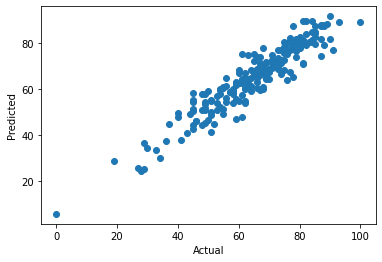

In [124]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

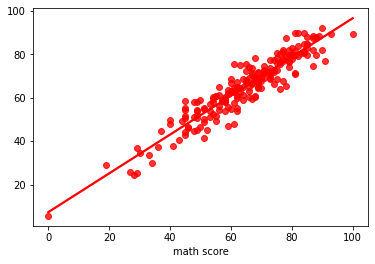

In [125]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [126]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852


# Model save

In [127]:
import joblib

In [128]:
filename = "finalized_model.sav"

In [129]:
joblib.dump(model, filename)

['finalized_model.sav']

In [130]:
loaded_model=joblib.load(filename)

In [131]:
result =loaded_model.score(X_test, y_test)

In [132]:
result

0.8838026201112223